# p04: Periodic spectral differentiation

We compute derivatives of following periodic functions on finite interval

$$
v(x) = \max(0, 1-|x-\pi|/2), \qquad x \in [0,2\pi]
$$

and

$$
v(x) = \exp(\sin(x)), \qquad x \in [0,2\pi]
$$

In [1]:
%config InlineBackend.figure_format='svg'
from numpy import pi,inf,linspace,zeros,arange,sin,cos,tan,exp,maximum,abs
from numpy.linalg import norm
from scipy.linalg import toeplitz
from matplotlib.pyplot import figure,subplot,plot,axis,title,text

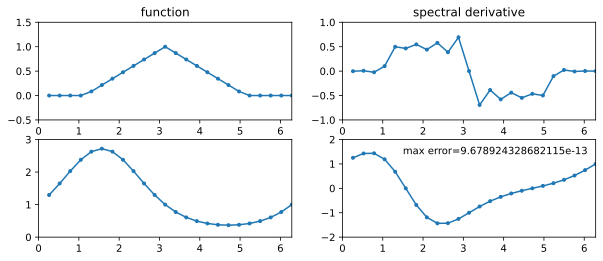

In [2]:
# Set up grid and differentiation matrix:
N = 24; h = 2*pi/N; x = h*arange(1,N+1);
col = zeros(N)
col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
D = toeplitz(col,-col)

figure(figsize=(10,6))

# Differentiation of a hat function:
v = maximum(0,1-abs(x-pi)/2)
subplot(3,2,1)
plot(x,v,'.-')
axis([0, 2*pi, -.5, 1.5])
title('function')
subplot(3,2,2)
plot(x,D.dot(v),'.-')
axis([0, 2*pi, -1, 1])
title('spectral derivative')

# Differentiation of exp(sin(x)):
v = exp(sin(x)); vprime = cos(x)*v;
subplot(3,2,3)
plot(x,v,'.-')
axis([0, 2*pi, 0, 3])
subplot(3,2,4)
plot(x,D.dot(v),'.-')
axis([0, 2*pi, -2, 2])
error = norm(D.dot(v)-vprime,inf)
text(1.5,1.4,"max error="+str(error));